In [ ]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics





In [ ]:
digits = load_digits()
type(digits.data)


numpy.ndarray

In [ ]:
(digits.data.shape, digits.target.shape, digits.images.shape)
# 1797 images, each 8x8 in dimension and 1797 labels.

((1797, 64), (1797,), (1797, 8, 8))

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')

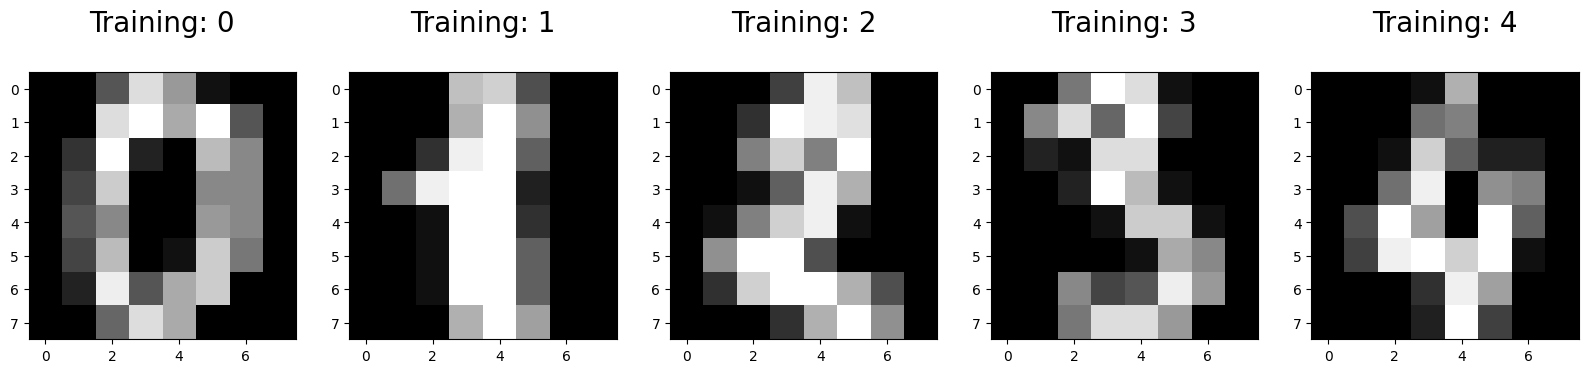

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5],
                                           digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                   digits.target,
                                                   test_size=0.25,
                                                   random_state=0)

In [ ]:
X_train.shape, X_test.shape


((1347, 64), (450, 64))

In [ ]:
# clf = LogisticRegression()

In [ ]:
clf = make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(X_train, y_train)  # apply scaling on training data

# clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
# Returns a NumPy Array
# Predict for One Observation (image)
clf.predict(X_test[0].reshape(1,-1))
clf.predict(X_test[0:10])
predictions = clf.predict(X_test)

In [ ]:
# Use score method to get accuracy of model
score = clf.score(X_test, y_test)
print(score)

0.9666666666666667


In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


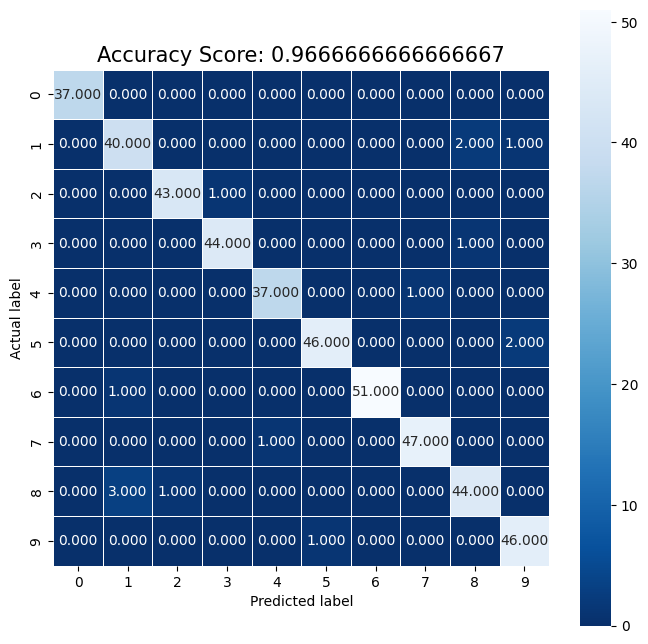

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()